# Missing value imputation: MeanMedianImputer

The MeanMedianImputer() replaces missing data by the mean or median value of the variable. 

It works only with numerical variables.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from  feature_engine.imputation import MeanMedianImputer

# Download the data from Kaggle and store it
# in the same folder as this notebook.

data = pd.read_csv(r'C:\Users\devanshu.tayal\Downloads\houseprices.csv')

data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [2]:
# Separate the data into train and test sets.

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(['Id', 'SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((2043, 79), (876, 79))

## Check missing data

In [3]:
# Numerical variables with missing data

X_train[['LotFrontage', 'MasVnrArea']].isnull().mean()

LotFrontage    0.162996
MasVnrArea     0.006853
dtype: float64

## Imputation with the median

Let's start by imputing missing data in 2 variables with their median.

In [4]:
# Set up the imputer.

imputer = MeanMedianImputer(
    imputation_method='median',
    variables=['LotFrontage', 'MasVnrArea'],
)

# Find median values

imputer.fit(X_train)

MeanMedianImputer(variables=['LotFrontage', 'MasVnrArea'])

In [5]:
# Dictionary with the imputation values for each variable.

imputer.imputer_dict_

{'LotFrontage': 68.0, 'MasVnrArea': 0.0}

In [6]:
# Let's corroborate that the dictionary 
# contains the median values of the variables.

X_train[['LotFrontage', 'MasVnrArea']].median()

LotFrontage    68.0
MasVnrArea      0.0
dtype: float64

In [7]:
# impute the data

train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

# Check we no longer have NA

train_t[['LotFrontage', 'MasVnrArea']].isnull().sum()

LotFrontage    0
MasVnrArea     0
dtype: int64

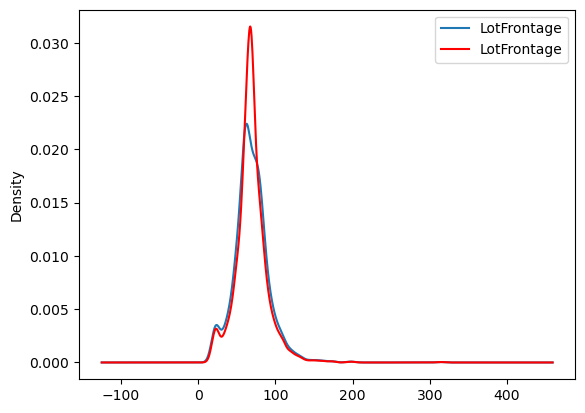

In [8]:
# The variable distribution changed slightly with
# more values accumulating towards the median 
# after the imputation.

fig = plt.figure()
ax = fig.add_subplot(111)
X_train['LotFrontage'].plot(kind='kde', ax=ax)
train_t['LotFrontage'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

## Automatically select all numerical variables

Let's now impute all numerical variables with the mean.

If we leave the parameter `variables` to `None`, the transformer identifies and imputes all numerical variables.

In [9]:
# Set up the imputer

imputer = MeanMedianImputer(
    imputation_method='mean',
)

# Find numerical variables and their mean.

imputer.fit(X_train)

MeanMedianImputer(imputation_method='mean')

In [10]:
# Numerical variables identified.

imputer.variables_

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold']

In [11]:
# The imputation value, the mean, for each variable

imputer.imputer_dict_

{'MSSubClass': 56.901615271659324,
 'LotFrontage': 68.99239766081871,
 'LotArea': 10243.491434165442,
 'OverallQual': 6.070484581497797,
 'OverallCond': 5.572197748409202,
 'YearBuilt': 1971.0895741556535,
 'YearRemodAdd': 1984.296133137543,
 'MasVnrArea': 102.31739773287333,
 'BsmtFinSF1': 442.65181194906955,
 'BsmtFinSF2': 47.12193927522037,
 'BsmtUnfSF': 555.0323212536729,
 'TotalBsmtSF': 1044.8060724779627,
 '1stFlrSF': 1153.3954968184044,
 '2ndFlrSF': 335.59177679882526,
 'LowQualFinSF': 4.741556534508076,
 'GrLivArea': 1493.7288301517376,
 'BsmtFullBath': 0.43312101910828027,
 'BsmtHalfBath': 0.061734443900048994,
 'FullBath': 1.5628976994615762,
 'HalfBath': 0.37151248164464024,
 'BedroomAbvGr': 2.853157121879589,
 'KitchenAbvGr': 1.0425844346549193,
 'TotRmsAbvGrd': 6.43220753793441,
 'Fireplaces': 0.5942241801272639,
 'GarageYrBlt': 1977.9760914760914,
 'GarageCars': 1.7507345739471107,
 'GarageArea': 466.181194906954,
 'WoodDeckSF': 94.57660303475282,
 'OpenPorchSF': 47.76358

In [12]:
# impute the data

train_t = imputer.transform(X_train)
test_t = imputer.transform(X_test)

# the numerical variables do not have NA after
# the imputation.

test_t[imputer.variables_].isnull().sum()

MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
dtype: int64